<a href="https://colab.research.google.com/github/Yash43oss/Casting_dataset/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Classifier Model**
1. Import required libraries

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog

2. Set up paths to your dataset folders

In [5]:
train_ok_path = '/content/drive/MyDrive/archive/casting_data/casting_data/train/ok_front'
train_def_path = '/content/drive/MyDrive/archive/casting_data/casting_data/train/def_front'
test_ok_path = '/content/drive/MyDrive/archive/casting_data/casting_data/test/ok_front'
test_def_path = '/content/drive/MyDrive/archive/casting_data/casting_data/test/def_front'

3. Extract [HOG](https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f) features from image

In [6]:
def extract_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True)
    return features

4. Process training data for better accuracy

In [7]:
def load_data(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(image, (300, 300))  # Resize images to a uniform size
        features = extract_features(resized_img)
        images.append(features)
        labels.append(label)
    return images, labels

5. Load training data

In [8]:
ok_images, ok_labels = load_data(train_ok_path, 0)  # Label 0 for 'Ok'
def_images, def_labels = load_data(train_def_path, 1)  # Label 1 for 'Defective'

6. Combining data(Different preprocessing techniques). [Click here](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) to know more

In [9]:
X = np.vstack((ok_images, def_images))
y = np.hstack((ok_labels, def_labels))

7. Split data into training and [validation sets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=21)

8. Training [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

9. Predictions on validation datasets

In [12]:
y_pred = clf.predict(X_val)

10. Model accuracy

In [13]:
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       279
           1       0.92      0.95      0.94       385

    accuracy                           0.93       664
   macro avg       0.93      0.92      0.92       664
weighted avg       0.93      0.93      0.93       664

Accuracy: 0.9262048192771084


11. Predictions(model)

In [14]:
validation_predictions = clf.predict(X_val)
print(validation_predictions)

[1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 1 

12. Misclassified images count with confidance

In [15]:
# Calculate the number of misclassified images and confidence levels
misclassified_count = 0
misclassified_confidence = []

for idx in range(len(y_pred)):
    if y_pred[idx] != y_val[idx]:  # Check for misclassification
        misclassified_count += 1

        # Get the index of the predicted class in the predicted probability array
        pred_index = clf.classes_.tolist().index(y_pred[idx])
        # Obtain the confidence level for the misclassified prediction
        confidence = clf.predict_proba(X_val[idx].reshape(1, -1))[0][pred_index] * 100
        misclassified_confidence.append(confidence)

# Calculate the average confidence for misclassified images
if misclassified_count > 0:
    average_confidence = sum(misclassified_confidence) / misclassified_count
else:
    average_confidence = 0

print(f"Number of misclassified images: {misclassified_count}")
print(f"Average confidence in misclassified images: {average_confidence:.2f}%")




Number of misclassified images: 49
Average confidence in misclassified images: 54.49%


13. Visualization for misclassified images

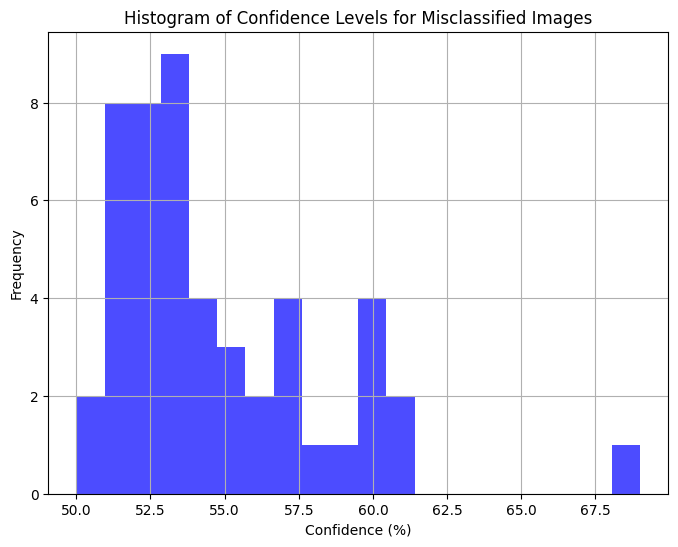

In [16]:
import matplotlib.pyplot as plt

# Calculate the number of misclassified images and confidence levels
misclassified_count = 0
misclassified_confidence = []

for idx in range(len(y_pred)):
    if y_pred[idx] != y_val[idx]:  # Check for misclassification
        misclassified_count += 1

        # Get the index of the predicted class in the predicted probability array
        pred_index = clf.classes_.tolist().index(y_pred[idx])
        # Obtain the confidence level for the misclassified prediction
        confidence = clf.predict_proba(X_val[idx].reshape(1, -1))[0][pred_index] * 100
        misclassified_confidence.append(confidence)

# Plotting the histogram of confidence levels for misclassified images
plt.figure(figsize=(8, 6))
plt.hist(misclassified_confidence, bins=20, alpha=0.7, color='blue')
plt.xlabel('Confidence (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence Levels for Misclassified Images')
plt.grid(True)
plt.show()
